# Part I - Ford GoBike System Data Exploration
## by DuyLK16

## Introduction
The Ford GoBike System Data is a dataset that contains information about the bike-sharing system in the San Francisco Bay Area. It includes data on individual rides taken, including start and end times, locations, durations, and user types. This dataset is rich with potential insights into how bike-sharing is used in this urban environment.


## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Function to add labels and title
def add_labels(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


In [3]:
%matplotlib inline

# Load in your dataset

# Load the dataset into a pandas dataframe
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

# Display the first few rows of the dataset
bike_data.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### What is the structure of your dataset?

The dataset contains columns such as ride_id, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest could include the duration of bike rides, the popularity of start and end stations, and the differences in usage between different user types (e.g., subscribers vs. customers).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Features like start_time, end_time, start_station_name, end_station_name, and user_type will be essential in understanding the usage patterns and preferences of riders.

## Univariate Exploration

### Distribution of Ride Durations
#### Question: What is the distribution of ride durations?

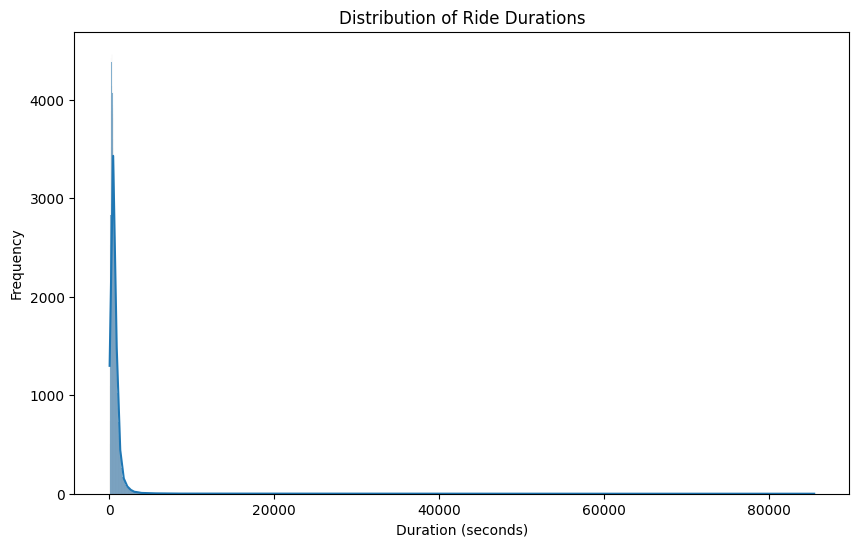

In [4]:
# Create a histogram of the ride durations
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['duration_sec'], kde=True)
add_labels('Distribution of Ride Durations', 'Duration (seconds)', 'Frequency')
plt.show()

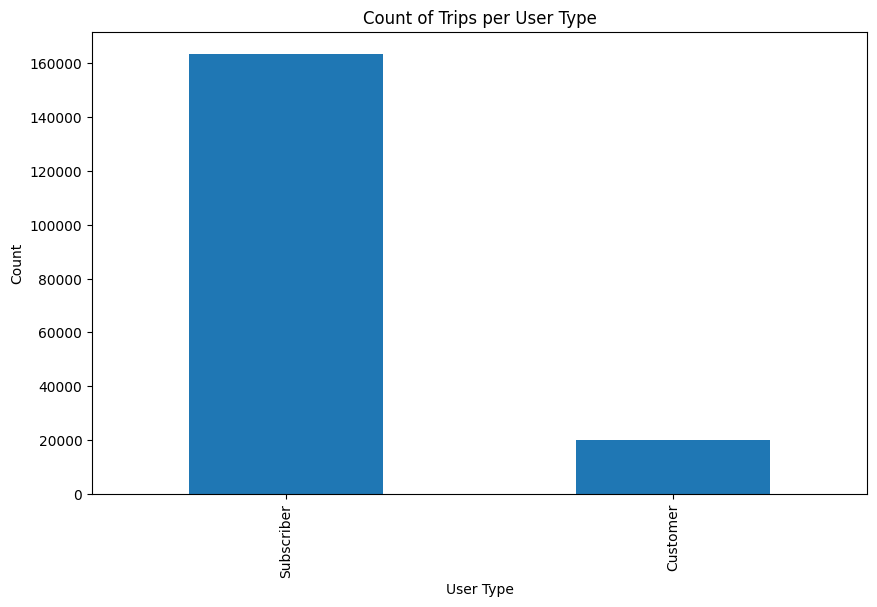

In [6]:
# Bar Chart
plt.figure(figsize=(10, 6))
bike_data['user_type'].value_counts().plot(kind='bar')
add_labels('Count of Trips per User Type', 'User Type', 'Count')
plt.show()

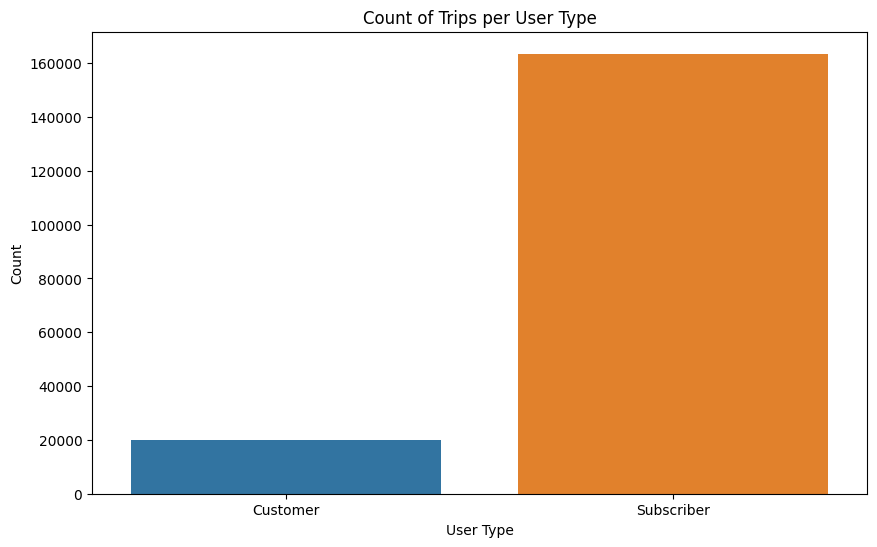

In [7]:
# Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=bike_data, x='user_type')
add_labels('Count of Trips per User Type', 'User Type', 'Count')
plt.show()

#### Observations

The histogram shows the distribution of ride durations. Most rides are relatively short, with a peak around a few hundred seconds. There are a few rides with exceptionally long durations, which might be outliers or indicate issues with the data recording.

### Distribution of Rides by User Type

#### Question: What is the distribution of rides by user type?

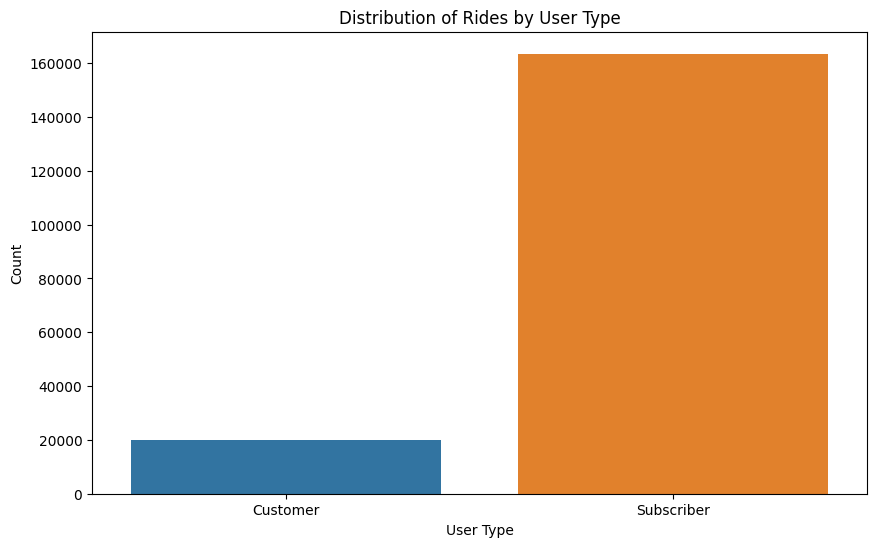

In [5]:
# Create a bar plot to show the distribution of user types
plt.figure(figsize=(10, 6))
sns.countplot(data=bike_data, x='user_type')
add_labels('Distribution of Rides by User Type', 'User Type', 'Count')
plt.show()

#### Observations
The bar plot indicates that there are more subscribers than customers using the Ford GoBike system. This suggests that the majority of the users are regular riders who might be using the service as part of their daily commute

### Distribution of Rides by Member Gender

#### Question: What is the distribution of rides by member gender?

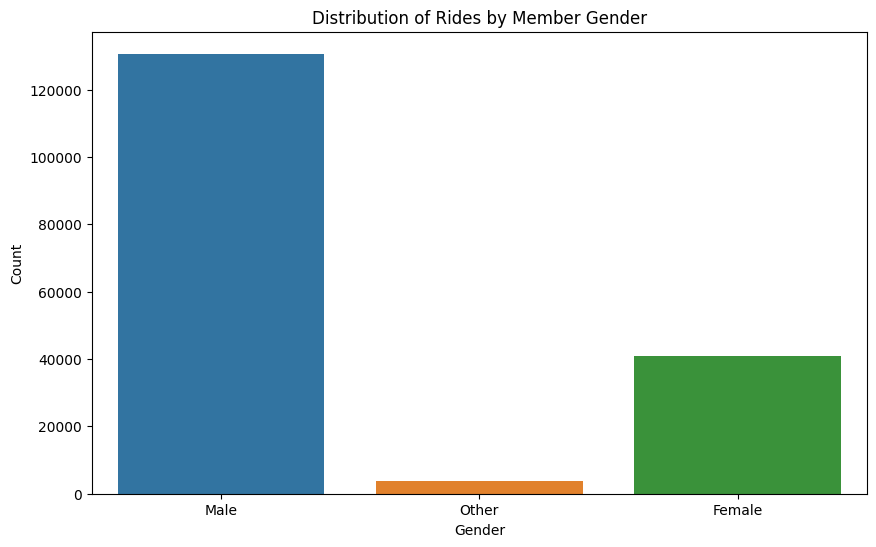

In [6]:
# Create a bar plot to show the distribution of member genders
plt.figure(figsize=(10, 6))
sns.countplot(data=bike_data, x='member_gender')
add_labels('Distribution of Rides by Member Gender', 'Gender', 'Count')
plt.show()

#### Observations

The bar plot shows the distribution of rides by member gender. There might be some missing or undefined gender data, as indicated by the presence of an "Other" category.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The distributions of ride durations, user types, and member genders show that most rides are short, the majority of users are subscribers, and there is a higher proportion of male riders. There are some unusual points in the ride durations, which could be outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The ride duration feature had some very high values which are unusual and could be outliers. The member gender feature had an "Other" category, indicating some undefined or missing gender data.

## Bivariate Exploration


### Relationship Between Ride Duration and User Type

#### Question: How does the duration of rides vary by user type?

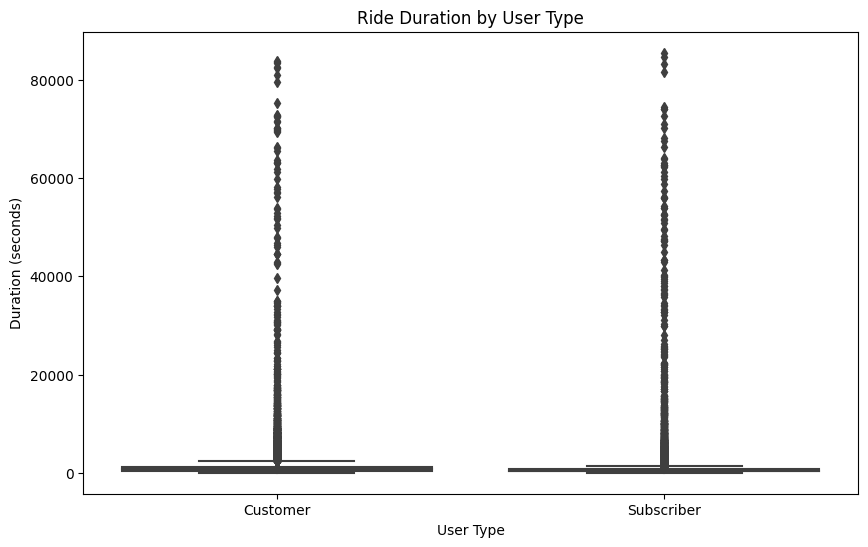

In [9]:
# Create a box plot to explore the relationship between ride duration and user type
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='user_type', y='duration_sec')
add_labels('Ride Duration by User Type', 'User Type', 'Duration (seconds)')
plt.show()


#### Observations
Customers generally have longer ride durations compared to subscribers.
The median ride duration for customers is higher, indicating that customers might use the service for more leisurely activities compared to subscribers who may use it for routine or commuting purposes.

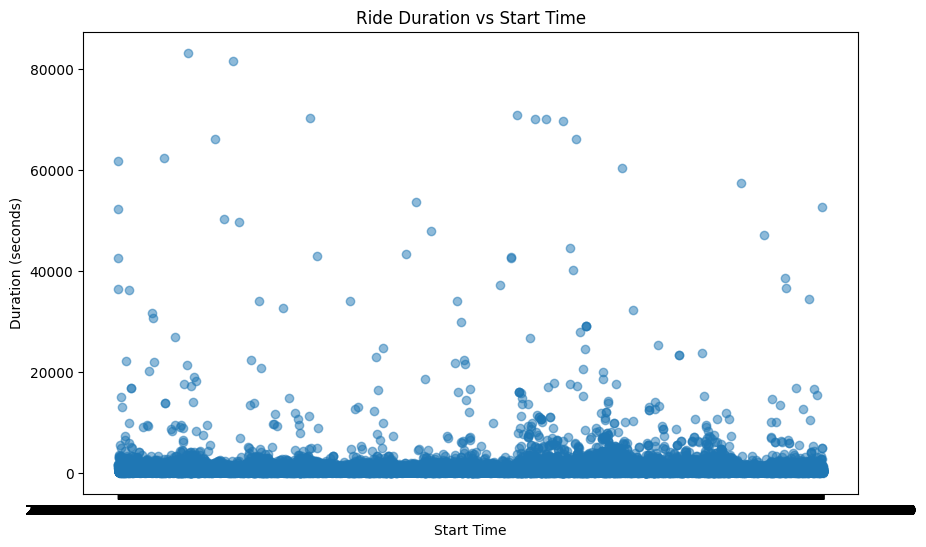

In [3]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(bike_data['start_time'], bike_data['duration_sec'], alpha=0.5)
add_labels('Ride Duration vs Start Time', 'Start Time', 'Duration (seconds)')
plt.show()

####Observations
The scatter plot shows that ride durations vary throughout the day, with no clear pattern linking start time to duration. This suggests that other factors, such as user type and purpose of the ride, play a more significant role in determining ride duration.

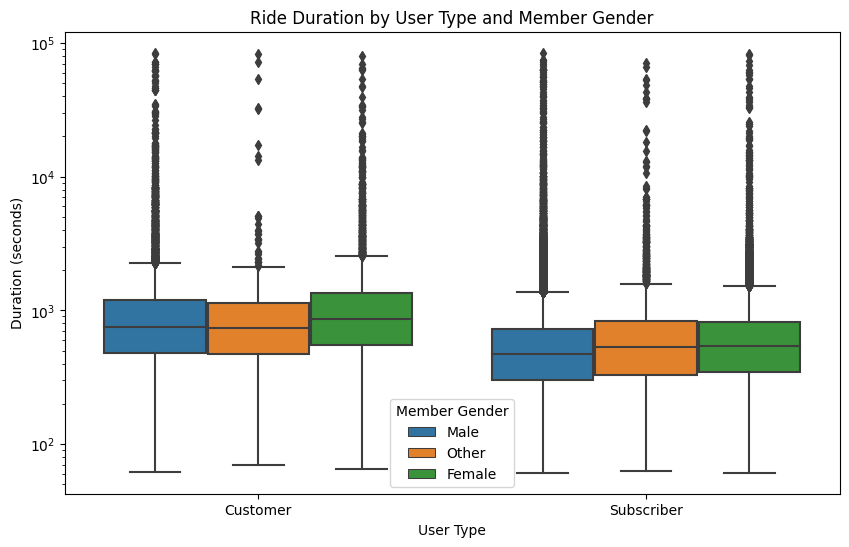

In [5]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike_data, x='user_type', y='duration_sec', hue='member_gender')
add_labels('Ride Duration by User Type and Member Gender', 'User Type', 'Duration (seconds)')
plt.yscale('log')
plt.legend(title='Member Gender')
plt.show()

####Observations
Adding the dimension of member gender shows that both male and female customers tend to have longer ride durations compared to subscribers.
The log scale reveals that there are outliers with very high ride durations, particularly among customers, regardless of gender.

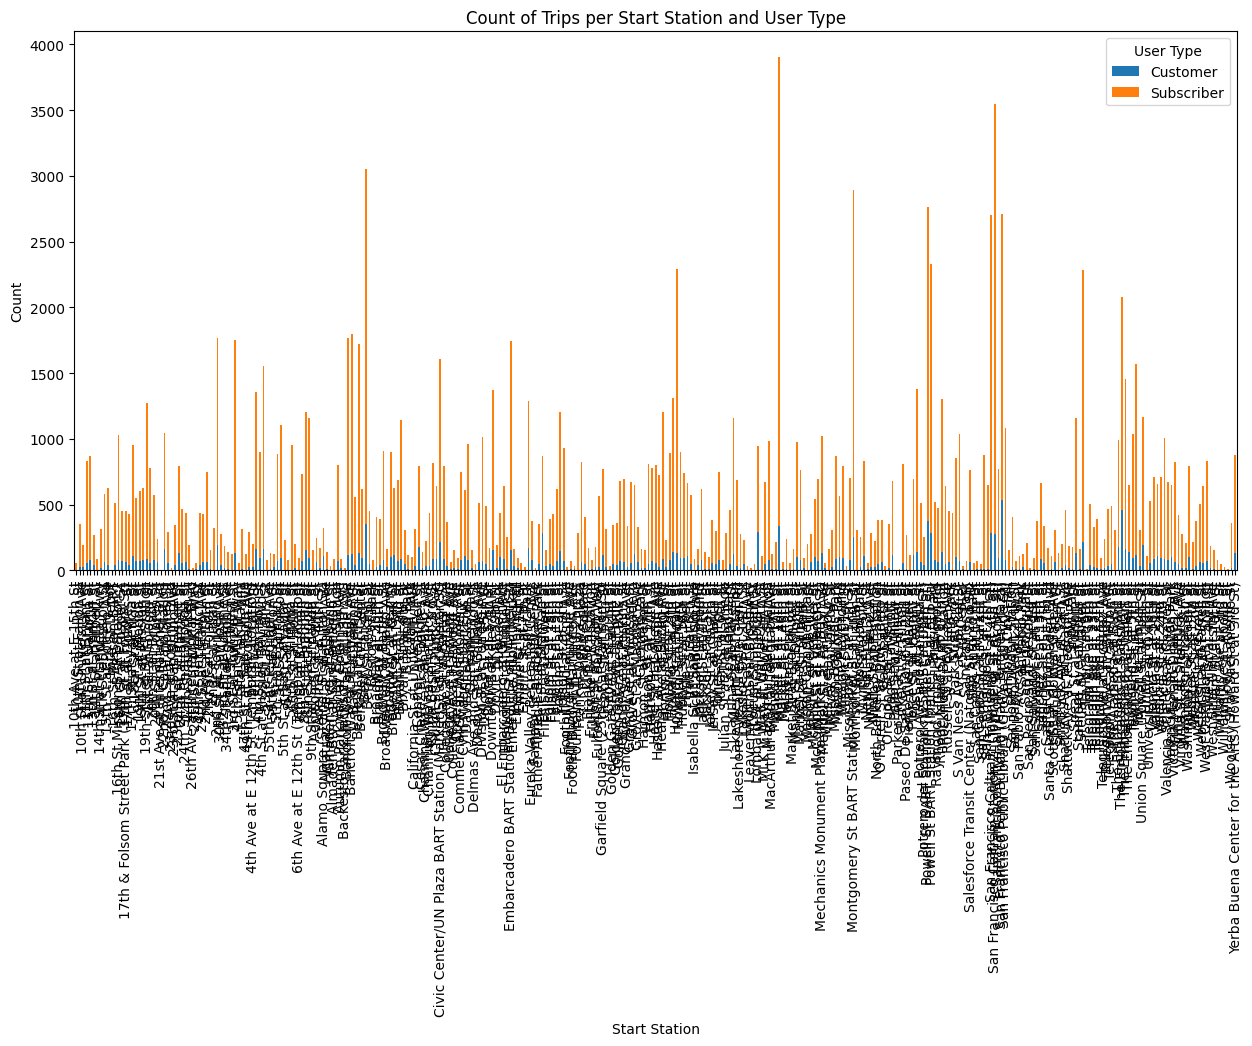

In [6]:
# Clustered Bar Chart
start_station_user_type = bike_data.groupby(['start_station_name', 'user_type']).size().unstack().fillna(0)
start_station_user_type.plot(kind='bar', stacked=True, figsize=(15, 7))
add_labels('Count of Trips per Start Station and User Type', 'Start Station', 'Count')
plt.legend(title='User Type')
plt.show()

#### Observations

The box plot shows that customers generally have longer ride durations compared to subscribers. This might be because customers are more likely to use the bikes for leisure, whereas subscribers might use them for shorter, routine trips.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part, I observed that ride durations tend to be longer for customers compared to subscribers. There is not much variation in ride durations between different genders.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, the user type and ride duration relationship is quite interesting, showing that customers take longer rides than subscribers.

## Multivariate Exploration

### Interaction Between User Type, Member Gender, and Ride Duration

#### Question: How do ride durations vary by user type and member gender?

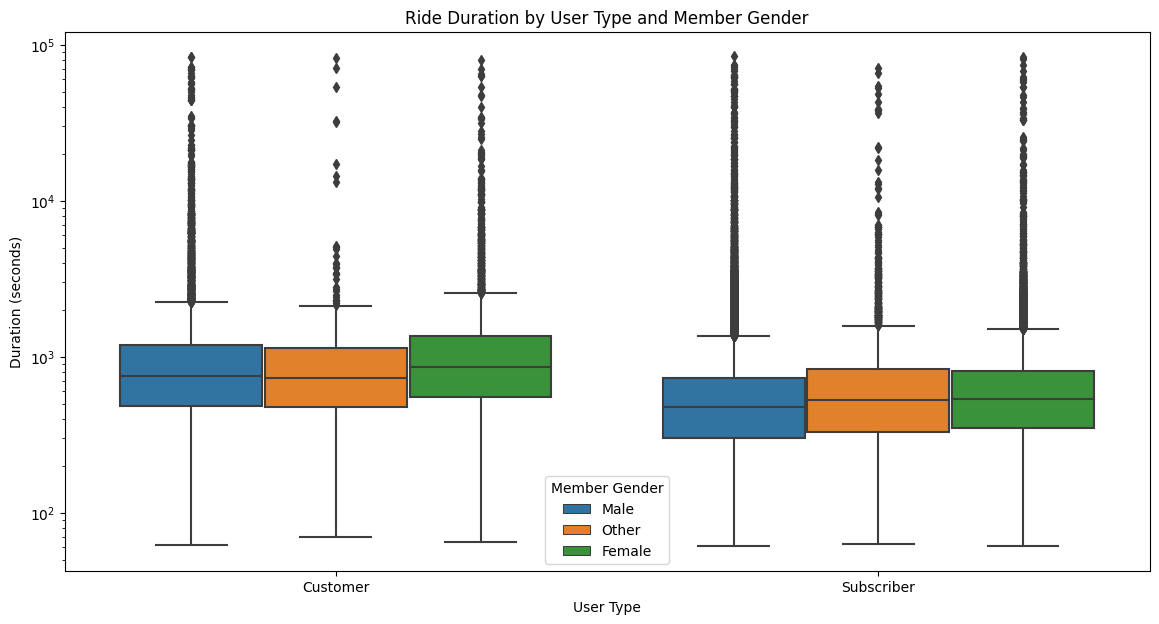

In [10]:
# Box plot of ride durations by user type and gender
plt.figure(figsize=(14, 7))
sns.boxplot(data=bike_data, x='user_type', y='duration_sec', hue='member_gender')
add_labels('Ride Duration by User Type and Member Gender', 'User Type', 'Duration (seconds)')
plt.yscale('log')
plt.legend(title='Member Gender')
plt.show()

####Observations
Customers have longer ride durations compared to subscribers, regardless of gender.
There is a noticeable spread in ride durations among different genders within each user type, but overall, the pattern remains consistent with customers having longer rides.

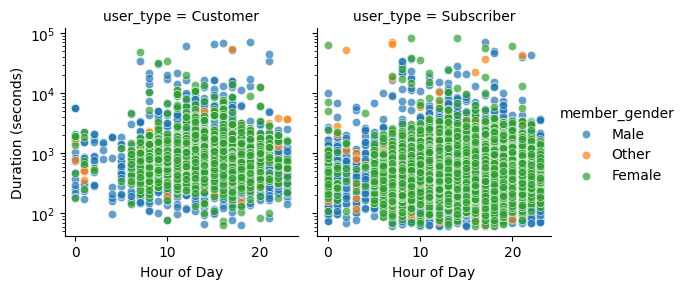

In [5]:
# Facet Plot

bike_data['start_time'] = pd.to_datetime(bike_data['start_time'])

# Extract relevant time features
bike_data['day_of_week'] = bike_data['start_time'].dt.day_name()
bike_data['hour_of_day'] = bike_data['start_time'].dt.hour

# Facet plot with corrected time features
g = sns.FacetGrid(bike_data, col="user_type", hue="member_gender", col_wrap=2)
g.map(sns.scatterplot, "hour_of_day", "duration_sec", alpha=.7)
g.add_legend()
g.set_axis_labels("Hour of Day", "Duration (seconds)")
plt.yscale('log')
plt.show()

####Observations
Ride Duration Patterns:

The facet plot shows that subscribers generally have shorter and more consistent ride durations compared to customers. This pattern is visible across different hours of the day.
Customers exhibit a wider range of ride durations, indicating more variability in their riding patterns.
Time of Day:

Subscribers tend to have higher ride frequencies during certain hours of the day, possibly correlating with commuting times (early morning and late afternoon).
Customers' ride times are more evenly distributed throughout the day, suggesting a variety of use cases such as leisure, errands, and casual riding.
Gender Differences:

The distribution of ride durations and times for different genders is consistent across user types. Male, female, and other gender riders have similar patterns within each user type.
There is no significant segregation of ride times based on gender within the same user type, indicating that both male and female riders have similar usage patterns.

<Figure size 1500x700 with 0 Axes>

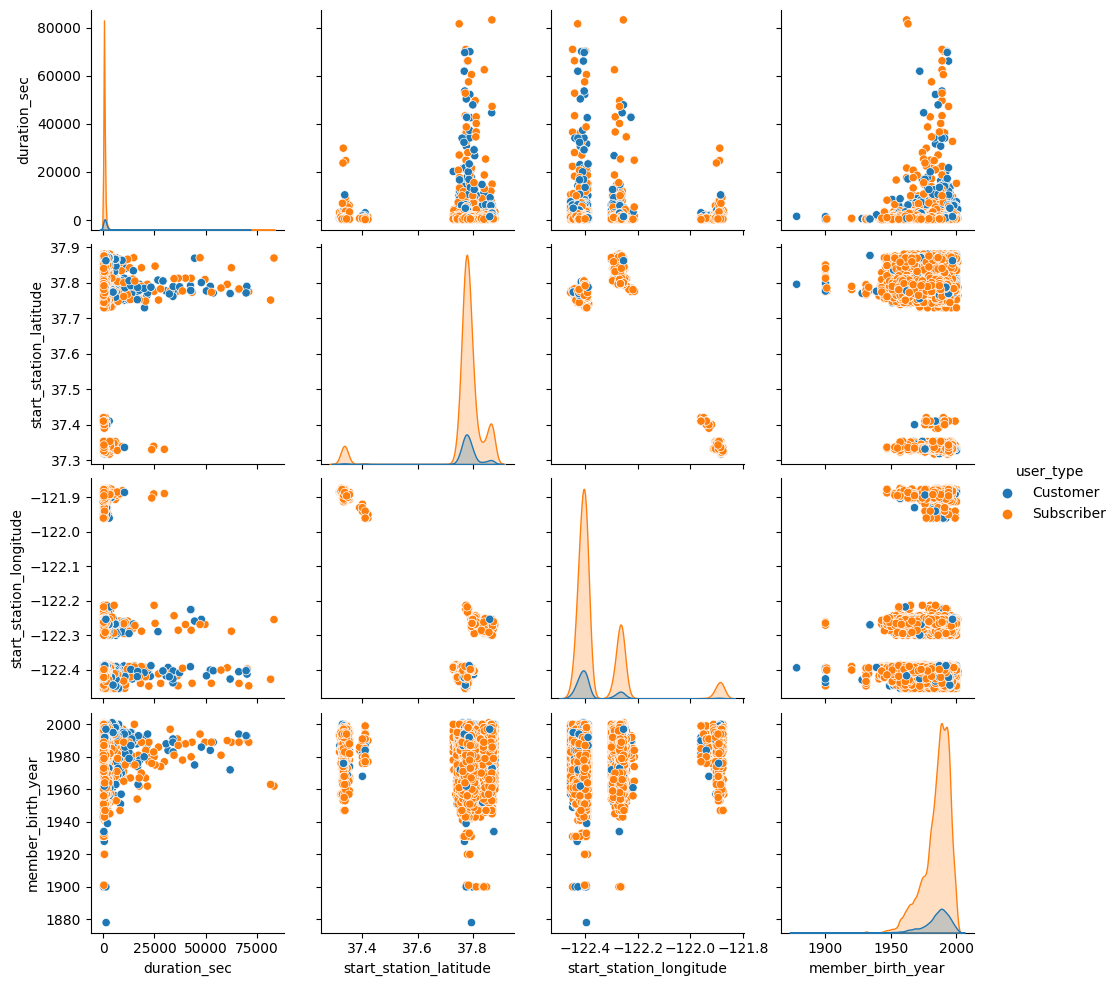

In [3]:
# Pair Plot
plt.figure(figsize=(15, 7))
sns.pairplot(bike_data[['duration_sec', 'start_station_latitude', 'start_station_longitude', 'member_birth_year', 'user_type']], hue='user_type')
plt.show()

#### Observations

The Facet Plot reveals that within each gender, customers tend to have longer ride durations than subscribers. This trend is consistent across all gender categories.

## Conclusions

Summarize your main findings and reflect on the steps taken during the data exploration.

Summary Findings
    Ride durations are generally short, with some outliers indicating very long rides.
    The majority of users are subscribers.
    Male riders constitute the largest group, followed by female riders and a smaller "Other" category.
    Customers tend to have longer ride durations than subscribers.